In [3]:
#!pip install graphviz

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("tumor_two_var.csv")

X = df[["size", "p53_concentration"]]
y = df["is_cancerous"]

X_train, X_test = train_test_split(X, test_size = 0.4, random_state = 42)
y_train, y_test = train_test_split(y, test_size = 0.4, random_state = 42)

model = DecisionTreeClassifier(max_depth = 2, random_state=0)

model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print("score_train : ", score_train)
print("score_test : ", score_test)

# Affichage du graphe de l'arbre de décision
#plot_tree(model, feature_names= ["size", "p53_concentration"], class_names=["is_cancerous"],filled=True)
#plt.show()


score_train :  0.9716666666666667
score_test :  0.9725


In [5]:
import numpy as np

# Définition de la fonction predict_cancer
def predict_cancer(size, p53_concentration):
    verdict = 0
    if (size >= 0.03) or (size < 0.03 and p53_concentration >= 0.01):
        verdict = 1
    return verdict
  
# Chargement du dataset
df = pd.read_csv("tumor_two_var.csv")

# Recherche des cancers
df["predictions"] = df.apply(lambda row: predict_cancer(row["size"], row["p53_concentration"]), axis=1)
df


size  p53_concentration  is_cancerous  predictions
0   -0.004165           0.001785             1            0
1    0.012898           0.001899             1            0
2    0.013674           0.001193             1            0
3    0.008774           0.003673             0            0
4    0.009751           0.005571             0            0
..        ...                ...           ...          ...
995  0.024509           0.004692             0            0
996 -0.000506           0.002411             0            0
997  0.016338           0.001857             1            0
998  0.011024           0.000236             1            0
999  0.007553           0.000428             1            0

[1000 rows x 4 columns]

In [6]:
num_cas_cancer = (df[df["predictions"] == 1])["predictions"].count()
num_cas_cancer

30

## Activité 12 - Ensembling : nombre de modèles
Emettre une conjecture concernant l'évolution des performances de généralisation en fonction du nombre d'estimateur de la random forest.

On va maintenant vérifier la conjecture : 

Entraîner plusieurs Random forests avec différentes valeurs de n_estimator : 5, 10, 20, etc. 

et afficher l'évolution de la performance sur le train et le test

Votre conjecture est-elle valide ?

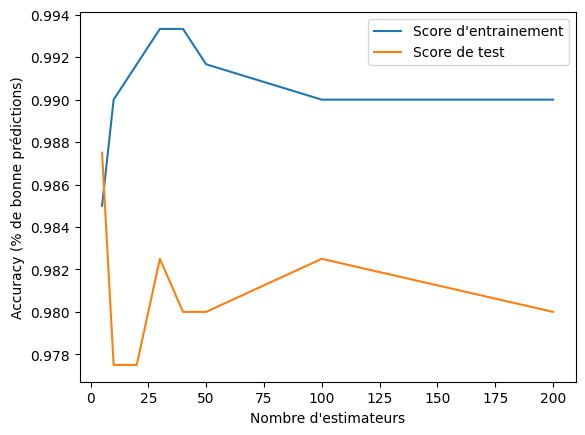

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Création d'un tableau de différents estimateurs
estimators = [5, 10, 20, 30, 40, 50, 100, 200]

# Creation de tableaux pour stocker les scores de train et test
train_scores = []
test_scores = []

# Calculons les score en ittérant sur les différentes valeurs des estimateurs
for estimator in estimators:
  # Creation d'un  random forest classifier avec le nombre d'estimateur: estimator
  model = RandomForestClassifier(n_estimators=estimator)
  
  # Calcul de la mean cross-validation score sur les données d'entrainement
  train_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
  train_scores.append(train_score)
  
  # Calcul de la mean cross-validation score sur les données de test
  test_score = np.mean(cross_val_score(model, X_test, y_test, cv=5))
  test_scores.append(test_score)

# Plot the train and test scores as a function of the number of estimators
plt.plot(estimators, train_scores, label="Score d'entrainement")
plt.plot(estimators, test_scores, label="Score de test")
plt.xlabel("Nombre d'estimateurs")
plt.ylabel("Accuracy (% de bonne prédictions)")
plt.legend()
plt.show()



La conjecture selon laquelle les performances de généralisation d'une forêt aléatoire augmentent avec le nombre d'estimateurs peut être valide dans certains cas, mais il est important de tester différents nombres d'estimateurs et de vérifier les performances de généralisation pour déterminer le nombre optimal d'estimateurs.
Dans notre cas, on remarque qu'à partir de 100 estimateur, on atteint un plateau avec les données de test alors que ce dernier est atteint avec 50 estimateurs avec les données d'entrainement et on risque un sur-apprentissage 

# Bagging

In [8]:
import pandas as pd

df = pd.DataFrame({
    'sucre': [1, 2, 3, 4, 0],
    'gras': [2, 3, 1, 5, 1],
    'nutri_ok': [1, 0, 0, 0, 1]
})

In [9]:
dataset1  = df.sample(4)
dataset2  = df.sample(4)
dataset3  = df.sample(4)

In [10]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()
model3 = DecisionTreeClassifier()

model1.fit(dataset1.drop(columns=['nutri_ok']), dataset1['nutri_ok'])
model2.fit(dataset1.drop(columns=['nutri_ok']), dataset1['nutri_ok'])
model3.fit(dataset1.drop(columns=['nutri_ok']), dataset1['nutri_ok'])

DecisionTreeClassifier()

In [11]:
y_pred_m1 = model1.predict(dataset1[['sucre', 'gras']])
y_pred_m2 = model2.predict(dataset2[['sucre', 'gras']])
y_pred_m3 = model3.predict(dataset3[['sucre', 'gras']])

print("Prediction model 1: ", y_pred_m1)
print("Prediction model 2: ", y_pred_m2)
print("Prediction model 3: ", y_pred_m3)

Prediction model 1:  [0 1 0 1]
Prediction model 2:  [1 1 0 0]
Prediction model 3:  [0 0 1 0]


## Test on Auto-sklearn 

In [12]:
#! pip3 install autosklearn==0.9.0

In [13]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

if __name__ == "__main__":
    X, y = sklearn.datasets.load_digits(return_X_y=True)
    X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)
    automl = autosklearn.classification.AutoSklearnClassifier()
    automl.fit(X_train, y_train)
    y_hat = automl.predict(X_test)
    print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

ModuleNotFoundError: No module named 'autosklearn'

## Auto-keras

In [ ]:
#! pip3 install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.4/162.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.4/162.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.9/166.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.9/166.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.1/166.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [19]:
! conda install -c conda-forge tensorflow

Solving environment: done

# All requested packages already installed.



## Python Faker test